In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#set stylesheet for figures
sns.set_theme(context='notebook', style='white', palette='viridis')
#define where dataset is located#
df = pd.read_csv("/home/kiri/Thesis/PCA_V1.csv")
#Print the data set - lets us check we've imported the correct thing#
print(df)

   VAD_type Lumen_number Infusion_Fluid  Flow_rate  Input_Velocity  \
0      PIVC       Single        Glucose         10            0.58   
1      PIVC       Single        Glucose         30            1.75   
2      PIVC       Single        Glucose         60            3.50   
3      PIVC       Single        Glucose        300           17.50   
4      PIVC       Single         Saline         10            0.58   
5      PIVC       Single         Saline         30            1.75   
6      PIVC       Single         Saline         60            3.50   
7      PIVC       Single         Saline        300           17.50   
8      PICC       Single        Glucose        150            0.08   
9      PICC       Single        Glucose        300            0.16   
10     PICC       Single        Glucose        600            0.33   
11     PICC       Single        Glucose       1185            0.65   
12     PICC       Single         Saline        150            0.08   
13     PICC       Si

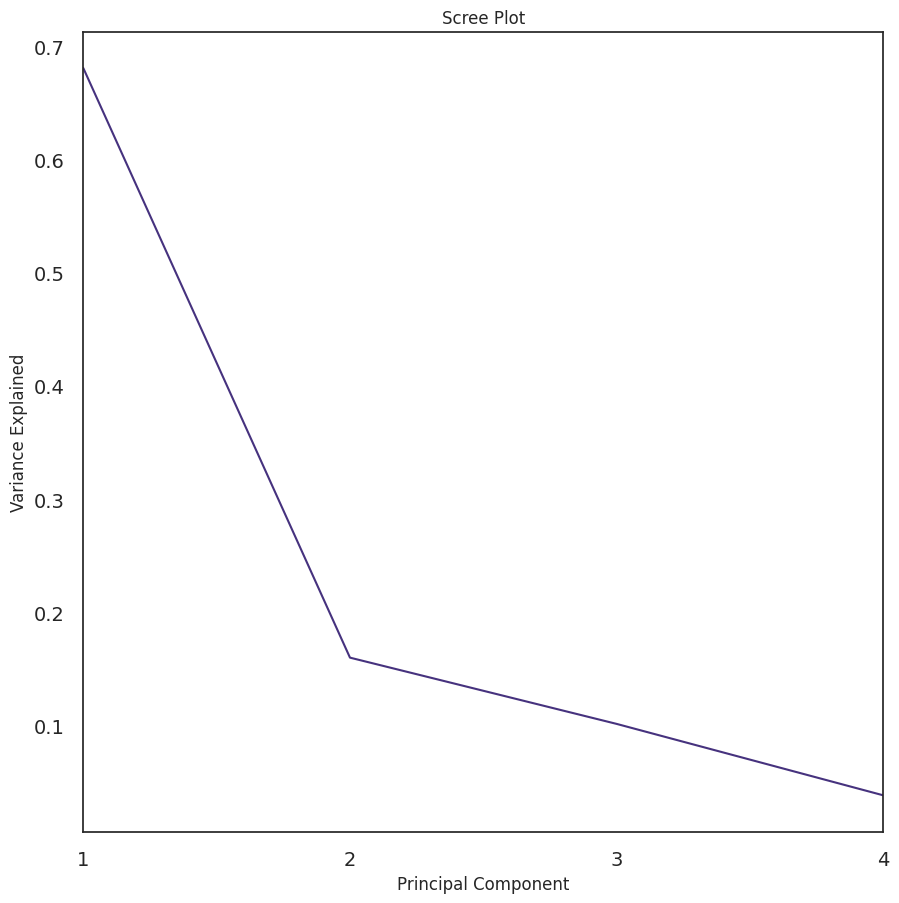

[0.68088792 0.16056095 0.10208401 0.03904304]


/tmp/ipykernel_30672/1660943028.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']


<Figure size 640x480 with 0 Axes>

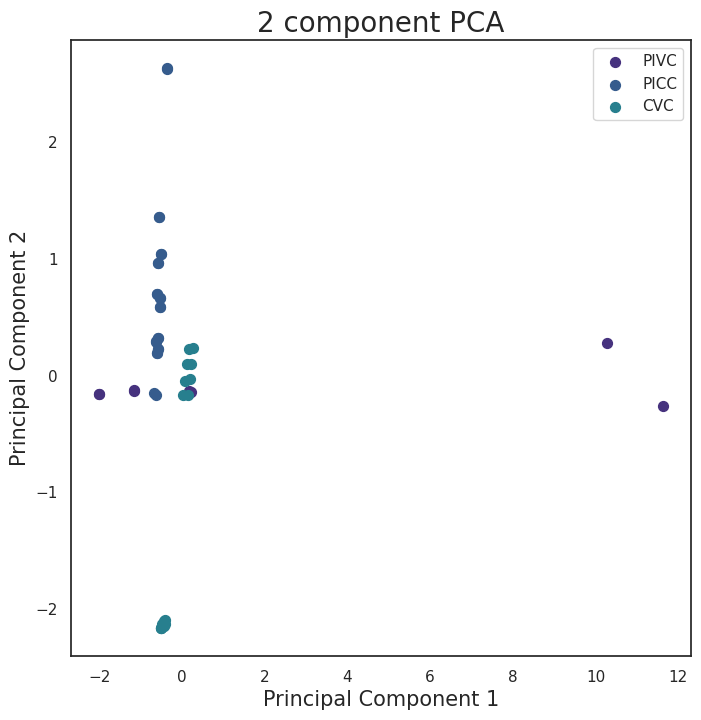

In [5]:
features = ['Flow_rate', 'Input_Velocity', 'Maximum_velocity', 'Average_velocity', 'Maximum_fluid_shear', 'Average_fluid_shear', 'Maximum_wall_shear_stress', 'Average_Wall_shear_stress']
x = df.loc[:, features].values
y= df.loc[:,['VAD_type','Infusion_Fluid','Lumen_number']].values 

x= StandardScaler().fit_transform(x)
pca = PCA(n_components=4)
principalComponents =pca.fit_transform(x)

principalDf= pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, df[['VAD_type','Lumen_number','Infusion_Fluid']]], axis = 1)

#Create the Scree Plot and calculate amount of variance explained by each principal component#
PC_values = np.arange(pca.n_components_) + 1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([1, 1, 1, 1])
ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.set_xlim(1, 4)
ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()
#Automatically save the plot this generates - matplotlib currently running a non-GUI backend so cannot visualise the plot#
matplotlib.pyplot.savefig('screeplot_nanoparticles.png')

#How much variance is explained by X number of principal components?#
print(pca.explained_variance_ratio_)
#the result of this is printed in the terminal - from this, we know that two PC are more than adequate to represent this data set.#

#Plot PCA - show first two components#
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['PIVC', 'PICC', 'CVC']
marker = ['o', 'v', 'X']
for target, marker in zip(targets,marker):
    indicesToKeep = finalDf['VAD_type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , cmap = 'viridis'
               , s = 50)
    
ax.legend(targets)
matplotlib.pyplot.savefig('PCA_nanoparticles.png')